### Nissan All Models Price Prediction 

In [97]:
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from plotly.subplots import make_subplots
import plotly.colors as colors

pio.templates.default = "plotly_white"

In [98]:
df = pd.read_csv("C:/Users/abu_s/Desktop/Data/json/Nissan price Pred/nissan-dataset.csv", encoding='latin1')

In [99]:
df.head(3)

id       full_name   age      gender          model   color  performance  \
0   1  Dominic Applin  42.0        Male          Quest    Mauv        299.0   
1   2     Lenee Eteen  54.0  Polygender        R'nessa  Orange        109.0   
2   3  Kendal Esselin  37.0        Male  March / Micra    Teal         52.0   

         km condition     price  
0  509305.0  very bad  40394.91  
1  965853.0       old   8687.90  
2  380906.0       bad  44705.31

In [100]:
df.isnull().sum()

id               0
full_name      843
age            846
gender         856
model          870
color          861
performance    857
km             859
condition      849
price          841
dtype: int64

In [101]:
m_fullname = df["full_name"].mode()
m_age = df["age"].mode()  # if space is part of the column name
m_gender = df["gender"].mode()
m_model = df["model"].mode()
m_performance = df["performance"].mean()  # if space is part of the column name
m_km = df["km"].mean()
m_condition = df["condition"].mode()
m_price = df["price"].mean()  # if space is part of the column name
m_color = df["color"].mode()


In [102]:
df["full_name"] = df["full_name"].fillna(m_fullname[0])  # Mode returns a Series; use [0] to get the value
df["age"] = df["age"].fillna(m_age[0])
df["gender"] = df["gender"].fillna(m_gender[0])
df["model"] = df["model"].fillna(m_model[0])
df["performance"] = df["performance"].fillna(m_performance)
df["km"] = df["km"].fillna(m_km)
df["condition"] = df["condition"].fillna(m_condition[0])
df["price"] = df["price"].fillna(m_price)
df["color"] = df["color"].fillna(m_color[0])


In [103]:
df.isnull().sum()

id             0
full_name      0
age            0
gender         0
model          0
color          0
performance    0
km             0
condition      0
price          0
dtype: int64

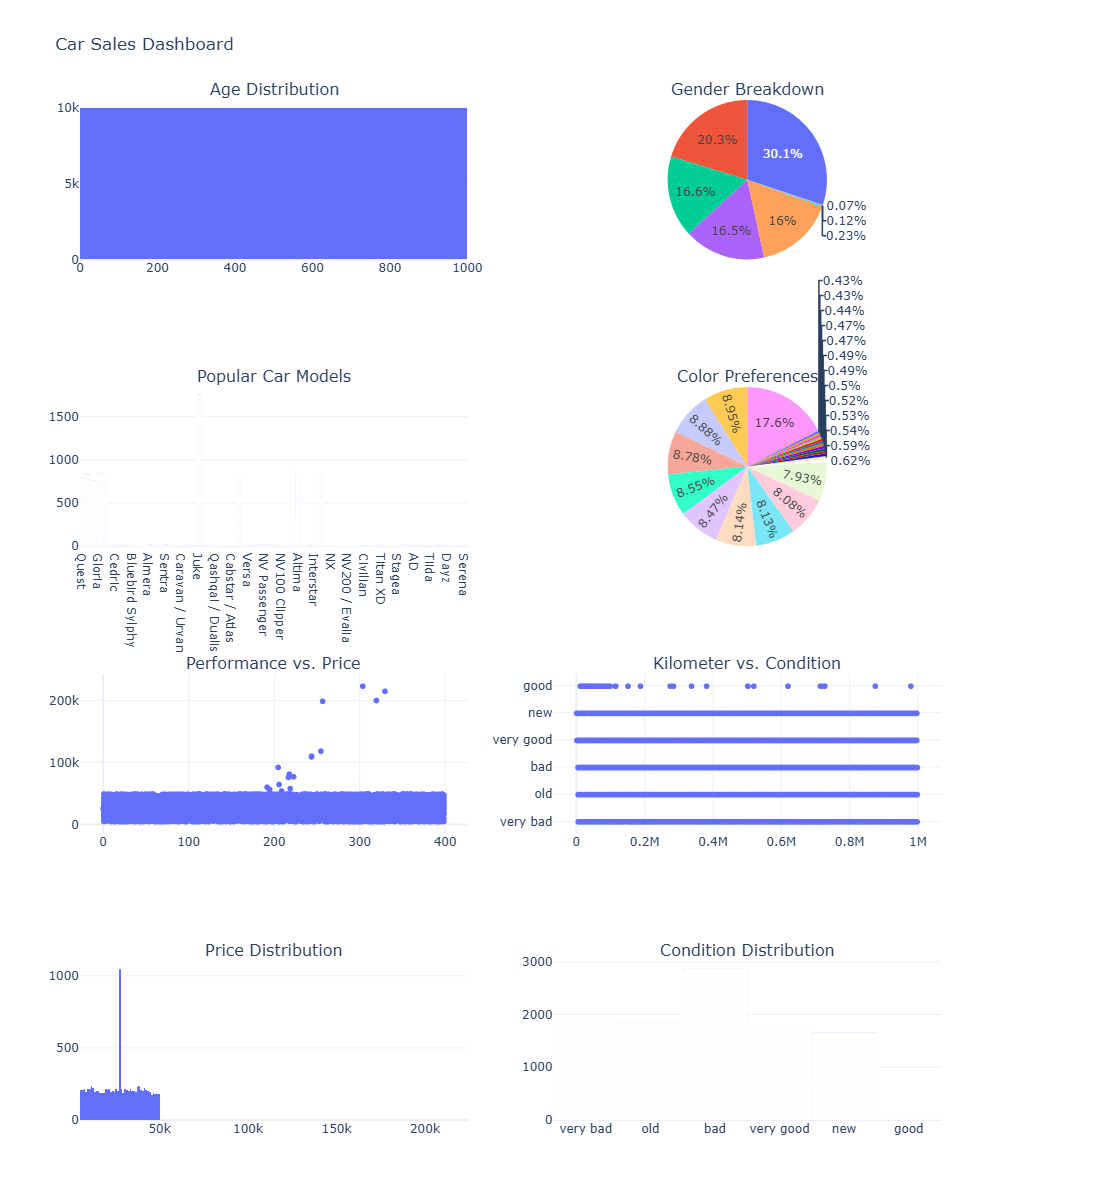

In [116]:




# Create Visualizations
# 1. Age Distribution
fig1 = px.histogram(df, x="age", title="Age Distribution of Customers")

# 2. Gender Breakdown
fig2 = px.pie(df, names="gender", title="Gender Breakdown")

# 3. Popular Car Models
fig3 = px.bar(df, x="model", title="Popular Car Models")

# 4. Color Preferences
fig4 = px.pie(df, names="color", title="Color Preferences")

# 5. Performance vs. Price
fig5 = px.scatter(df, x="performance", y="price", title="Performance vs. Price", hover_data=["model", "full_name"])

# 6. Kilometer Driven vs. Condition
fig6 = px.scatter(df, x="km", y="condition", title="Kilometer Driven vs. Condition", hover_data=["model", "full_name"])

# 7. Distribution of Car Prices
fig7 = px.histogram(df, x="price", title="Distribution of Car Prices")

# 8. Condition Distribution
fig8 = px.bar(df, x="condition", title="Condition Distribution")

# Display the dashboard in a grid layout
from plotly.subplots import make_subplots

# Create a subplot grid
fig_dashboard = make_subplots(
    rows=4, cols=2,
    subplot_titles=[
        "Age Distribution", "Gender Breakdown",
        "Popular Car Models", "Color Preferences",
        "Performance vs. Price", "Kilometer vs. Condition",
        "Price Distribution", "Condition Distribution"
    ],
    specs=[[{"type": "xy"}, {"type": "domain"}], 
           [{"type": "xy"}, {"type": "domain"}], 
           [{"type": "xy"}, {"type": "xy"}], 
           [{"type": "xy"}, {"type": "xy"}]]
)

# Add visualizations to the grid
fig_dashboard.add_trace(fig1.data[0], row=1, col=1)
fig_dashboard.add_trace(fig2.data[0], row=1, col=2)
fig_dashboard.add_trace(fig3.data[0], row=2, col=1)
fig_dashboard.add_trace(fig4.data[0], row=2, col=2)
fig_dashboard.add_trace(fig5.data[0], row=3, col=1)
fig_dashboard.add_trace(fig6.data[0], row=3, col=2)
fig_dashboard.add_trace(fig7.data[0], row=4, col=1)
fig_dashboard.add_trace(fig8.data[0], row=4, col=2)

# Update layout
fig_dashboard.update_layout(
    title="Car Sales Dashboard",
    height=1200,
    showlegend=False
)

# Show the dashboard
fig_dashboard.show()
